Human is 'O', Computer is 'X'.
Human goes first.

Board State:
 | | 
-----
 | | 
-----
 | | 


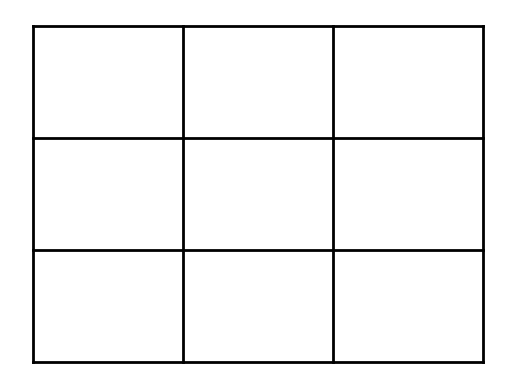

Enter your move (0-8): 1

Board State:
 |O| 
-----
 | | 
-----
 | | 


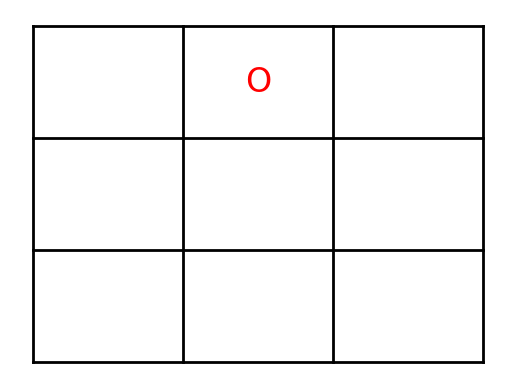

Computer is thinking...
Computer chose position 0.

Board State:
X|O| 
-----
 | | 
-----
 | | 


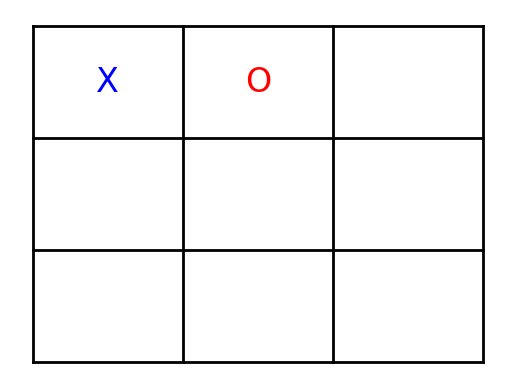

Enter your move (0-8): 5

Board State:
X|O| 
-----
 | |O
-----
 | | 


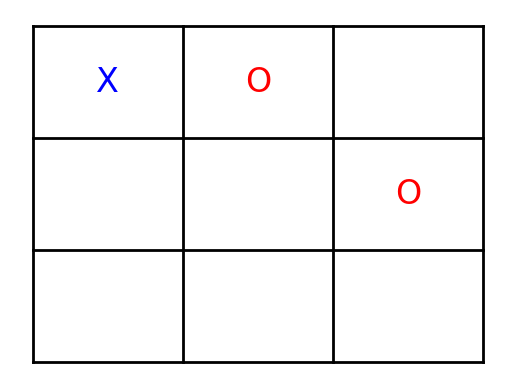

Computer is thinking...
Computer chose position 6.

Board State:
X|O| 
-----
 | |O
-----
X| | 


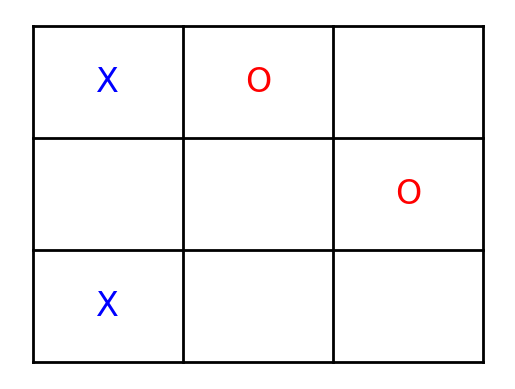

Enter your move (0-8): 8

Board State:
X|O| 
-----
 | |O
-----
X| |O


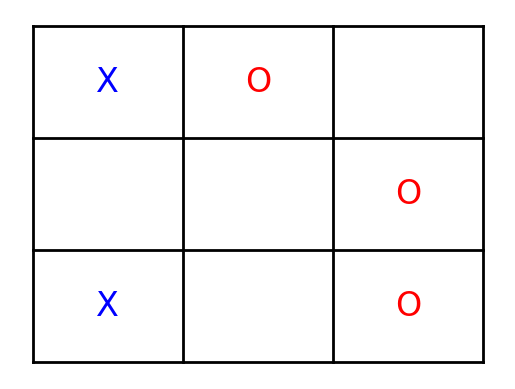

Computer is thinking...
Computer chose position 2.

Board State:
X|O|X
-----
 | |O
-----
X| |O


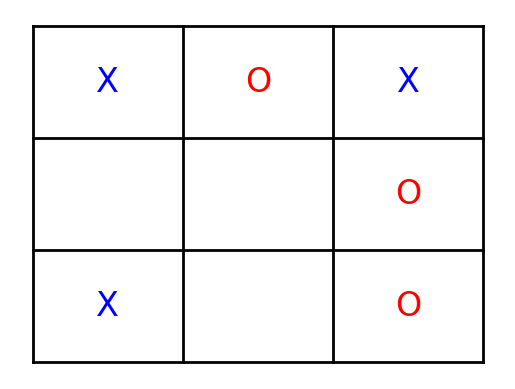

Enter your move (0-8): 4

Board State:
X|O|X
-----
 |O|O
-----
X| |O


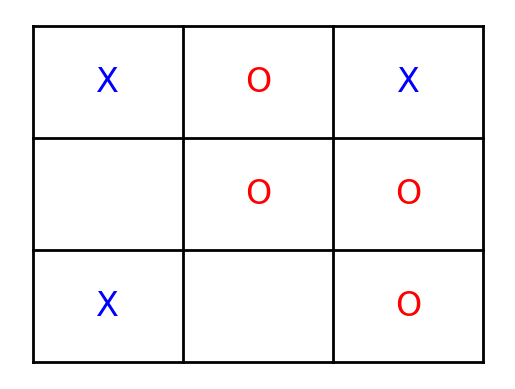

Computer is thinking...
Computer chose position 3.

Board State:
X|O|X
-----
X|O|O
-----
X| |O


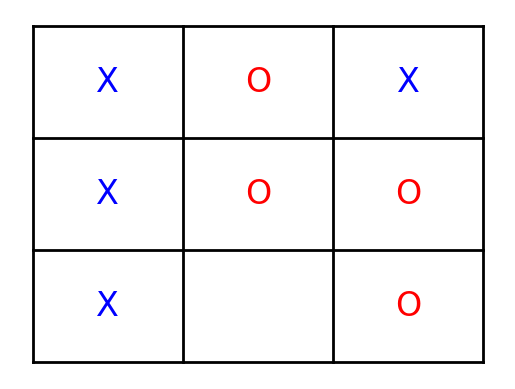

Computer wins!


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

# Function to check if the game is terminated
def check_if_terminated(state):
    """
    Input:
        state: (9,) matrix board of Tic-Tac-Toe

    Output:
        1: if agent wins (terminates)
        -1: if opponent wins (terminates)
        0: if draw
        -2: if not terminated
    """
    # Check rows
    for i in range(0, 9, 3):
        if state[i] != 0 and state[i] == state[i + 1] == state[i + 2]:
            return state[i]
    # Check columns
    for i in range(3):
        if state[i] != 0 and state[i] == state[i + 3] == state[i + 6]:
            return state[i]
    # Check diagonals
    if state[0] != 0 and state[0] == state[4] == state[8]:
        return state[0]
    if state[2] != 0 and state[2] == state[4] == state[6]:
        return state[2]
    # Check for draw
    if np.count_nonzero(state) == 9:
        return 0
    return -2

# Function to find all legal moves
def find_all_legal_moves(state):
    """
    Input:
        state: np.array, Shape:(9,), Integers

    Output:
        possible_actions: np.array, Shape(9,), 0/1
    """
    possible_actions = np.zeros((9,))
    for i in range(9):
        if state[i] == 0:
            possible_actions[i] = 1
    return possible_actions

# Function to visualize the Tic-Tac-Toe board
def visualize_board(state):
    symbols = {1: 'X', -1: 'O', 0: ' '}
    board = [symbols[cell] for cell in state]

    print("\nBoard State:")
    for i in range(0, 9, 3):
        print("|".join(board[i:i + 3]))
        if i < 6:
            print("-----")

    # Plotting the board
    fig, ax = plt.subplots()
    for i in range(4):
        ax.plot([0, 3], [i, i], color='black', linewidth=2)
        ax.plot([i, i], [0, 3], color='black', linewidth=2)

    for i, cell in enumerate(state):
        x = i % 3 + 0.5
        y = 2 - i // 3 + 0.5
        if cell == 1:
            ax.text(x, y, 'X', fontsize=24, ha='center', va='center', color='blue')
        elif cell == -1:
            ax.text(x, y, 'O', fontsize=24, ha='center', va='center', color='red')

    ax.axis('off')
    plt.show()

# Minimax with alpha-beta pruning
def minimax_pruned(state, depth, alpha, beta, maximizingPlayer):
    eval_ = check_if_terminated(state)
    if depth == 0 or eval_ != -2:
        return eval_, []

    if maximizingPlayer:  # Computer's turn
        maxEval = -math.inf
        poss_actions = find_all_legal_moves(state)
        best_move = None
        for i in range(len(poss_actions)):
            if poss_actions[i] == 1:
                new_state = state.copy()
                new_state[i] = 1
                currEval, _ = minimax_pruned(new_state, depth - 1, alpha, beta, False)
                if currEval > maxEval:
                    maxEval = currEval
                    best_move = i
                alpha = max(alpha, currEval)
                if beta <= alpha:
                    break
        return maxEval, [best_move]
    else:  # Human's turn
        minEval = math.inf
        poss_actions = find_all_legal_moves(state)
        best_move = None
        for i in range(len(poss_actions)):
            if poss_actions[i] == 1:
                new_state = state.copy()
                new_state[i] = -1
                currEval, _ = minimax_pruned(new_state, depth - 1, alpha, beta, True)
                if currEval < minEval:
                    minEval = currEval
                    best_move = i
                beta = min(beta, currEval)
                if beta <= alpha:
                    break
        return minEval, [best_move]

# Main function for gameplay
def play_game():
    state = np.zeros(9, dtype=int)  # Initial empty board
    human_turn = random.choice([True, False])  # Randomly decide who starts
    print("Human is 'O', Computer is 'X'.")
    print("Human goes first." if human_turn else "Computer goes first.")

    while True:
        visualize_board(state)
        result = check_if_terminated(state)
        if result != -2:
            if result == 1:
                print("Computer wins!")
            elif result == -1:
                print("Human wins!")
            else:
                print("It's a draw!")
            break

        if human_turn:
            while True:
                try:
                    move = int(input("Enter your move (0-8): "))
                    if move < 0 or move > 8 or state[move] != 0:
                        raise ValueError
                    break
                except ValueError:
                    print("Invalid move. Please try again.")
            state[move] = -1
        else:
            print("Computer is thinking...")
            _, move = minimax_pruned(state, 9 - np.count_nonzero(state), -math.inf, math.inf, True)
            state[move[0]] = 1
            print(f"Computer chose position {move[0]}.")

        human_turn = not human_turn

# Start the game
play_game()
